In [10]:
from traitlets.config.manager import BaseJSONConfigManager
path = "/Users/sharathchandra/anaconda/envs/py3k/etc/jupyter/nbconfig"
cm = BaseJSONConfigManager(config_dir=path)
cm.update("livereveal", {"autolaunch": True,
                         "theme": "sky",
                        } 
)


    

#Supress default INFO logging


# The UT Dallas Art Science Lab Training module 
print ("The ArtSci Lab Sonification Training Module. Instructions :")
print("\n")
print("1. Hit the Space Bar or Right Arrow (Bottom Right corner) to go to next section")
print("\n")
print("2. Press Shift + Enter at Every New Section to initiate display/execute a section")

Sonification Training Module. Instructions :


1. Hit the Space Bar or Right Arrow (Bottom Right corner) to go to next section


2. Press Shift + Enter at Every New Section to initiate display/execute a section


# Please put on your best headphones on and Set your system Volume to 50%. 
# Use Space Bar or arrows at bottom right to navigate to next section

In [14]:
%%HTML
<video width="640" height="480" controls>
  <source src="Listening_TestV2.mp4" type="video/mp4">
</video>
<b>Press Space Bar to proceed</b>




In [4]:
print("Could you hear sound on both headphones?")
yesno=['Yes','No']
button1 = widgets.Button(description = yesno[0])
button2 = widgets.Button(description = yesno[1])
#tts = gTTS(text=name+' Do you have a hearing disability? Click Yes or No', lang='en')
#tts.save("answer.mp3") 
#os.system("afplay answer.mp3")
container = widgets.HBox(children=[button1,button2])
display(container)

    
def on_button1_clicked(b):
    choice = b.description
    b.color = 'white'
    tts = gTTS(text='Great. Please use the scroll on the lower right corner to proceed on to the next section', lang='en')
    tts.save("answer.mp3") 
    os.system("afplay answer.mp3")
    clear_output()
    print("Please Proceed onto the next Section (Press Spacebar or Arrow at Bottom Right corner)")
        
def on_button2_clicked(b):
    # [insert code to record choice] 
    tts = gTTS(text='Please check your system sound settings and headphones & try again', lang='en')
    tts.save("answer.mp3") 
    os.system("afplay answer.mp3")
    container.close()
    clear_output()
    print("Please check your system sound settings and headphones & start afresh")

button1.on_click(on_button1_clicked)
button2.on_click(on_button2_clicked)

Could you hear sound on both headphones?


# Hearing Test Training Module
_You are about to embark on an adventure in listening_ 
It is important that you take the time to understanding your hearing. Everyone's hearing is slightly different. The first part of your path to listening for subtlties in spoken word, music and other sounds made from data is to self-evaluate your own hearing.
We suggest that you grab your best headphones and that you take an online hearing test 
## Be sure and test both ears individually and print out the results of both those tests. 
__As you move forward in these sonification training modules these print outs will aid you in self-evaluating your understanding of sound in relationship to your own ears and the way YOU are hearing the world.__

[ONLINE HEARING TEST link - click here](https://hearingtest.online) _REMEMBER: Print out the results for future reference_


# Please ensure to Reset your System Volume to 50% again. Hit Space Bar  or Right arrow at the lower right to navigate to the next section.

In [16]:
%%HTML
<video width="640" height="480" controls>
  <source src="percentages.mp4" type="video/mp4">
</video>

In [5]:
%run ./pan.py

print("Use the Slider to set a Value and Click the Sonify Me Button to listen. Try to explore and listen to the variation of as many values in the range")
print("\n")
print("Once you think you are ready proceed onto the next section by hitting Space Bar")
interact (f, percentage=(0,100,5))

button = widgets.Button(description="Sonify Me!")
display(button)
button.on_click(on_button_clicked)



Use the Slider to set a Value and Click the Sonify Me Button to listen. Try to explore and listen to the variation of as many values in the range


Once you think you are ready proceed onto the next section by hitting Space Bar


interactive(children=(IntSlider(value=50, description='percentage', step=5), Output()), _dom_classes=('widget-…

Button(description='Sonify Me!', style=ButtonStyle())

In [7]:
from IPython.display import Image, display, clear_output
from ipywidgets import Button, HBox, VBox,Layout,widgets

button = widgets.Button(description="Click here to Reset Sound Engine. Then Use the Right Arrow to go to the next Section", layout=Layout(width='80%', height='50px'))

display(button)

def next_button_clicked(b):
    pt.stop()
    pt.join()
    button = widgets.Button(description="Use the Space Bar or Right Arrow to go to the next section", layout=Layout(width='40%', height='50px'))
    clear_output()
    display(button)

button.on_click(next_button_clicked)


    




Button(description='Click here to Reset Sound Engine. Then Use the Right Arrow to go to the next Section', lay…

In [2]:
import random
import time
from IPython.display import Image, display, clear_output
from ipywidgets import Button, HBox, VBox,Layout
from ipywidgets import widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from gtts import gTTS
import os
import numpy
import ctcsound
import platform
import os
speechflag = 0
if (platform.system()=='Windows'):
    speechflag = 2
if (platform.system()!='Windows'):
    speechflag = 1

print ("Listen to the Sonification, Set the Slider to what Percentage you think it represents and Submit Response. You will undergo 5 trials")
count=0
accuracy =0

pan = 0
user_input=0
cs = ctcsound.Csound()
index = 0
csd = '''
<CsoundSynthesizer>
<CsOptions>
-odac -d

</CsOptions>
<CsInstruments>

sr = 44100
ksmps = 32
nchnls = 2
0dbfs = 1

instr 1

;aMod1 poscil 200, 700, 1
aMod1 poscil p4, p5, 1   ; p4 = amp1, p5 = f1, p6 = amp2, p7 = f2 
;aMod2 poscil 1800, 290, 1
aMod2 poscil p6, p7, 1
kenv linen p9 , 0.3 , p3, p9
aSig poscil kenv, 440+aMod1+aMod2, 1
outs aSig*(1-p8), aSig*p8
endin



</CsInstruments>
<CsScore>
f 0 14400
f 1 0 1024 10 1 

</CsScore>

</CsoundSynthesizer>
'''

cs.compileCsdText(csd)
cs.start()
pt = ctcsound.CsoundPerformanceThread(cs.csound())
pt.play()



def f(percentage):
    global user_input
    user_input = percentage



def redraw(): 
    
    global index
    global accuracy
    sonibutton = widgets.Button(description = 'Listen to Sonification')
    answerbutton = widgets.Button(description='Submit Response')
    choices = random.sample(range(100), 4)
    choices = list(map(str, choices))
    correct = random.choice(choices)
    index = int(correct)

    #display(Image(correct))
    #display(correct)
    time.sleep(0.5)
    
    
    #display(button)
    #button.on_click(on_button_clicked)
    
    #buttons = [widgets.Button(description = choice) for choice in choices]
    #sonibutton = [widgets.Button(description = 'Listen to Sonification')]
    interact (f, percentage=(0,100,1))
    #answerbutton = [widgets.Button(description='Submit Input')]
    
    #container = widgets.HBox(children=buttons)

    
    left_box = VBox([(sonibutton)])
    right_box = VBox([(answerbutton)])
    #HBox([left_box, right_box])
    container = widgets.HBox([left_box,right_box])
    print("Trial " + str(count+1))
    display(container)
    


    def ans_button_clicked(b):
            global count
            global accuracy
            count = count + 1
            
            
  

  
            tts = gTTS(text='Input Submitted', lang='en')
            tts.save("answer.mp3") 
            if (speechflag==1):
                os.system("afplay answer.mp3")
            if (speechflag==2):
                os.system("cmdmp3 answer.mp3")
            #print(user_input)
            text=list()
            text.append(index)
            text.append(user_input)
            text.append(index-user_input)
            accuracy = accuracy + abs(index -user_input)
            with open('responses.csv','a') as file:
                file.write('\n')
                for line in text:
                    file.write(str(line))
                    file.write(',')
            time.sleep(2)
            container.close()
            clear_output()
            if count <5:
                redraw()
            if count == 5:
                msg = widgets.Button(description = 'Thank you for finishing this module',layout=Layout(width='50%', height='80px'))
                display(msg)
                print("Your accuracy of response is " + str(100-(accuracy/5)) + "%")
                pt.stop()
                pt.join()
                file.close()
            
        
    def son_button_clicked(b):
            
            #tts = gTTS(text='Playing Sonification', lang='en')
            #tts.save("answer.mp3") 
            #os.system("afplay answer.mp3")
            
            in_min  = 0
            in_max = 100
            out_min=690
            out_max = 710
        
            global index
    
            if (index>50):
                pan = 1
            if (index<50):
                pan = 0
            if (index==50):
                pan = 0.5
            freq = (index - in_min) * (out_max - out_min) / (in_max - in_min) + out_min  
            #print(freq)  
    
            pt.scoreEvent(False, 'i', (1, 0, 4, 200, 700, 200, freq, pan, 0.5))
            time.sleep(4.5)
             
            
        
        
    answerbutton.on_click(ans_button_clicked)
    sonibutton.on_click(son_button_clicked)


 
   
    

redraw()

Button(description='Thank you for finishing this module', layout=Layout(height='80px', width='50%'), style=But…

Your accuracy of response is 80.6%


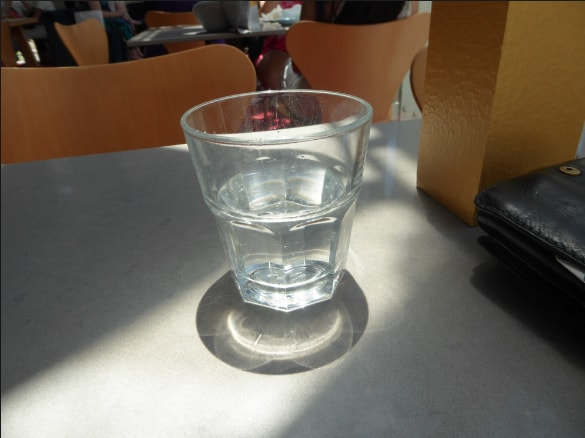

0

In [1]:
import random
from gtts import gTTS
import time
from IPython.display import Image, display, clear_output
from ipywidgets import widgets
import os


display(Image('glass.jpg'))
tts = gTTS(text=('In this sonification,we try to represent the emptiness or fullness of something. For instance a drop of water falling into an empty glass sounds like'), lang='en')
tts.save("num.mp3")
os.system("afplay num.mp3")
os.system("afplay empty.wav")
tts = gTTS(text=('Or the same drop of water falling into a full glass might sound like'), lang='en')
tts.save("num.mp3")
os.system("afplay num.mp3")
os.system("afplay full.wav")
tts = gTTS(text=('Notice, as how the saying goes, it is difficult to say if a glass is half empty '), lang='en')
tts.save("num.mp3")
os.system("afplay num.mp3")
os.system("afplay half_empty.wav")
tts = gTTS(text=('or half full '), lang='en')
tts.save("num.mp3")
os.system("afplay num.mp3")
os.system("afplay half_full.wav")
tts = gTTS(text=('Ok. Hit space bar to go to the next section where you can explore this sonification (before taking the test)'), lang='en')
tts.save("num.mp3")
os.system("afplay num.mp3")


  

   

In [8]:
%run ./drops.py
print("Use the Slider to set a Value and Click the Sonify Me Button to listen. Try to explore and listen to the variation of as many values in the range. Proceed to the next section when you think you are ready.")
interact (f, percentage=(0,100,1))

button = widgets.Button(description="Sonify Me!")
display(button)
button.on_click(on_button_clicked)




Use the Slider to set a Value and Click the Sonify Me Button to listen. Try to explore and listen to the variation of as many values in the range. Proceed to the next section when you think you are ready.


interactive(children=(IntSlider(value=50, description='percentage'), Output()), _dom_classes=('widget-interact…

Button(description='Sonify Me!', style=ButtonStyle())

In [ ]:
from IPython.display import Image, display, clear_output
from ipywidgets import Button, HBox, VBox,Layout,widgets

button = widgets.Button(description="Click here to Reset Sound Engine. And go to the next Section", layout=Layout(width='80%', height='50px'))

display(button)

def next_button_clicked(b):
    pt.stop()
    pt.join()
    button = widgets.Button(description="Use the Space Bar or Right Arrow to go to the next section", layout=Layout(width='40%', height='50px'))
    clear_output()
    display(button)

button.on_click(next_button_clicked)

In [9]:
import random
import time
from IPython.display import Image, display, clear_output
from ipywidgets import Button, HBox, VBox,Layout
from ipywidgets import widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from gtts import gTTS
import os
import numpy
import ctcsound
import platform
import os
speechflag = 0
if (platform.system()=='Windows'):
    speechflag = 2
if (platform.system()!='Windows'):
    speechflag = 1

print ("Listen to the Sonification, Set the Slider to what Percentage you think it represents and Submit Response. You will undergo 5 trials")
count=0
accuracy =0

pan = 0
user_input=0
cs = ctcsound.Csound()
index = 0

csd = '''
<CsoundSynthesizer>
<CsOptions>
-o dac
</CsOptions>
<CsInstruments>
;
sr = 44100
ksmps = 32
nchnls = 2
0dbfs = 1

giSine    ftgen     0, 0, 2^10, 10, 1

instr 1 ;master instrument
inumparts =         p4 ;number of partials
ibasfreq  =         200 ;base frequency
ipart     =         1 ;count variable for loop
;loop for inumparts over the ipart variable
;and trigger inumpartss instanes of the subinstrument
loop:
ifreq     =         ibasfreq * ipart
iamp      =         1/ipart/inumparts
          event_i   "i", 10, 0, p3, ifreq, iamp
          loop_le   ipart, 1, inumparts, loop
endin

instr 10 ;subinstrument for playing one partial
ifreq     =         p4 ;frequency of this partial
iamp      =         p5 ;amplitude of this partial
aenv      transeg   0, .01, 0, iamp, p3-0.1, -10, 0
apart     poscil    aenv, ifreq, giSine
          outs      apart, apart
endin



</CsInstruments>
<CsScore>
f 0 14400
f 1 0 1024 10 1 

</CsScore>

</CsoundSynthesizer>
'''

cs.compileCsdText(csd)
cs.start()
pt = ctcsound.CsoundPerformanceThread(cs.csound())
pt.play()



def f(percentage):
    global user_input
    user_input = percentage



def redraw(): 
    
    global index
    global accuracy
    sonibutton = widgets.Button(description = 'Listen to Sonification')
    answerbutton = widgets.Button(description='Submit Response')
    choices = random.sample(range(100), 4)
    choices = list(map(str, choices))
    correct = random.choice(choices)
    index = int(correct)

    #display(Image(correct))
    #display(correct)
    time.sleep(0.5)
    
    
    #display(button)
    #button.on_click(on_button_clicked)
    
    #buttons = [widgets.Button(description = choice) for choice in choices]
    #sonibutton = [widgets.Button(description = 'Listen to Sonification')]
    interact (f, percentage=(0,100,1))
    #answerbutton = [widgets.Button(description='Submit Input')]
    
    #container = widgets.HBox(children=buttons)

    
    left_box = VBox([(sonibutton)])
    right_box = VBox([(answerbutton)])
    #HBox([left_box, right_box])
    container = widgets.HBox([left_box,right_box])
    print("Trial " + str(count+1))
    display(container)
    


    def ans_button_clicked(b):
            global count
            global accuracy
            count = count + 1
            tts = gTTS(text='Input Submitted', lang='en')
            tts.save("answer.mp3") 
            
            if (speechflag==1):
                os.system("afplay answer.mp3")
            if (speechflag==2):
                os.system("cmdmp3 answer.mp3")
            
            text=list()
            text.append(index)
            text.append(user_input)
            text.append(index-user_input)
            accuracy = accuracy + abs(index -user_input)
            with open('drop_responses.csv','a') as file:
                file.write('\n')
                for line in text:
                    file.write(str(line))
                    file.write(',')
            time.sleep(2)
            container.close()
            clear_output()
            if count <5:
                redraw()
            if count == 5:
                msg = widgets.Button(description = 'Thank you for finishing this module',layout=Layout(width='50%', height='80px'))
                display(msg)
                print("Your accuracy of response is " + str(100-(accuracy/5)) + "%")
                pt.stop()
                pt.join()
                file.close()
            
        
    def son_button_clicked(b):
            
            #tts = gTTS(text='Playing Sonification', lang='en')
            #tts.save("answer.mp3") 
            #os.system("afplay answer.mp3")
            
            in_min  = 0
            in_max = 100
            out_min=0
            out_max = 20
        
            global index
    
            freq = (index - in_min) * (out_max - out_min) / (in_max - in_min) + out_min  
            #print(freq)  
    
            pt.scoreEvent(False, 'i', (1, 0, 3,freq))
            time.sleep(4.5)
             
            
        
        
    answerbutton.on_click(ans_button_clicked)
    sonibutton.on_click(son_button_clicked)


 
   
    

redraw()

Listen to the Sonification, Set the Slider to what Percentage you think it represents and Submit Response. You will undergo 5 trials


interactive(children=(IntSlider(value=50, description='percentage'), Output()), _dom_classes=('widget-interact…

Trial 1
